# Handout 1: Instance-based Learning (Problem 4)

### 0.1. Functions Definition

In this initial subsection, we will define the different functions that will be used.

In [2]:
import numpy as np
from numpy import array, dot
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

In [3]:
def plot(X, y, title, xlabel, ylabel):
    #plt.scatter(XP1[:,0],XP1[:,1], c=yP1)
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], color= '#FFFF00', label='class 1')
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], color= '#6A5ACD', label='class 2')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [4]:
def plot_knn(classifier, X, y, classes, k, weights, data_type):
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[np.where(y > 0)[0]][:,0], X[np.where(y > 0)[0]][:,1], color= '#FFFF00', label='class 1')
    plt.scatter(X[np.where(y < 0)[0]][:,0], X[np.where(y < 0)[0]][:,1], color= '#6A5ACD', label='class 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-Class classification (k = %i, weights = '%s') (%s)"
              % (classes, k, weights, data_type))

    plt.legend()

### 1. Data Loading and Pre-Processing

The data can be found in two files, the training data in `datasets10/ds1034tr.txt` and the testing data in `datasets10/ds1034te.txt`. This file contains data points pertaining to two different classes.

First, let's load and visualize the data. 

In [5]:
group = '10'
ds = 34
train = np.loadtxt('datasets10/ds'+group+str(ds)+'tr.txt')

In [6]:
test = np.loadtxt('datasets10/ds'+group+str(ds)+'te.txt')

Let's visualize the training data:

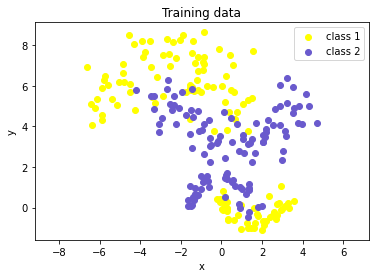

In [7]:
plot(train[:, 0:2], train[:, 2:3], "Training data", "x", "y")

Now, the testing data: 

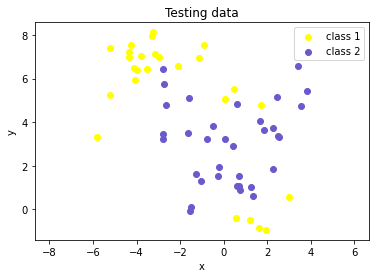

In [8]:
plot(test[:, 0:2], test[:, 2:3], "Testing data", "x", "y")

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
scaler_train.fit(train)
train_transformed = scaler_train.transform(train)

The training data will be saved in `X_train` (data points coordinates) and `y_train` (class of the points), and the testing data will be saved in `X_test` and `y_test`.

In [10]:
X_train = train_transformed[:, 0:2]
y_train = train_transformed[:, 2:3]
y_train = np.where(y_train == 0, -1, y_train)

### **Problem 4**. K Nearest Neighbors Classifier - Best parameters and cross validation.

We will use the K-Nearest Neighbors algorithm to find the separation between the two classes. This algorithm can be found in the `sklearn` library. The requirement of the problem is to find the **best model**, so we will need to create different KNN classifiers with different parameters and determine which one performs better.  

### 1. Defining the parameters

The SVM classifiers can be tweaked and modified by changing the kernel and the `C`.

1. **Number of neighbors:** Number of neighbors to use by default for kneighbors queries. We will use **[1, 3, 7, 15].**
2. **Weights**: weight function used in prediction. We will use **uniform**, **distance**.
3. **Metric**: the distance metric to use for the tree. We will use the **euclidean** and the **manhattan** distances. 

In [11]:
parameters = {'n_neighbors':[1, 3, 7, 15],
              'weights':['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

### 2. Obtaining the best model

Now, we will use the `GridSearchCV` from the `sklearn.model_selection` library to determine which combination of parameters gives the best model accuracy.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
res = clf.fit(X_train, y_train.reshape(y_train.shape[0]))

In [13]:
print(f"The best parameters are: {clf.best_params_}")

The best parameters are: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


### 3. Training the model

Now, we use the parameters obtained before to create our K-Nearest Neighbor classifier. 

In [15]:
h = .02
neigh = KNeighborsClassifier(n_neighbors=res.best_params_['n_neighbors'],
                            metric = res.best_params_['metric'],
                            weights = res.best_params_['weights'])
neigh.fit(X_train, y_train.reshape((y_train.shape[0],)))

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Now, let's plot the results.

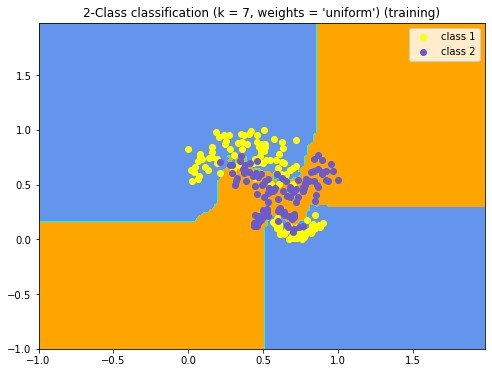

In [16]:
plot_knn(neigh, X_train, y_train, 2, res.best_params_['n_neighbors'], res.best_params_['weights'], 'training')

### 4. Validating the obtained KNN model

Let's validate the model. First, let's use the test data and predict the classes for each one of the points. The validation of the model is done by comparing the predicted classes to the actual classes of the points.

First, let's scale the testing data points.

In [18]:
scaler_test = MinMaxScaler()
scaler_test.fit(test)
test_transformed = scaler_test.transform(test)
X_test = test_transformed[:, 0:2]
y_test = test_transformed[:, 2:3]
y_test = np.where(y_test == 0, -1, y_test)

Now let's predict the results for the given testing data points. 

In [19]:
prediction = neigh.predict(X_test)

Let's visualize the confusion matrix for this prediction.

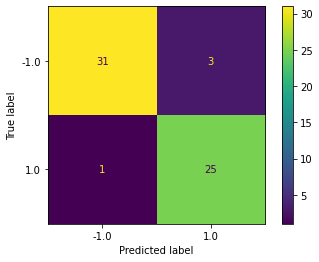

In [21]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh, X_test, y_test)  

We can see that the model was able to classify 31/34 points of the first class, and 25/26 of the points of the second class. Even though it has misclassified a few points, it still has a good performance. Let's see just how well this model works and determine the accuracy score, the recall score and the F1 score:

In [22]:
print(f"Model accuracy: {accuracy_score(y_test, prediction)} Model recall score: {recall_score(y_test, prediction, average='macro')} Model F1 score: {f1_score(y_test, prediction, average='macro')}")

Model accuracy: 0.9333333333333333 Model recall score: 0.9366515837104072 Model F1 score: 0.9326599326599327


Let's visualize the testing data points.

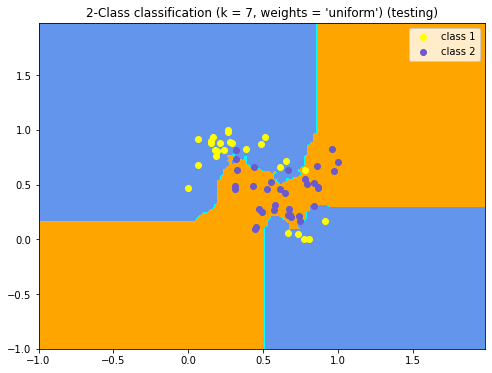

In [40]:
plot_knn(neigh, X_test, y_test, 2, res.best_params_['n_neighbors'], res.best_params_['weights'], 'testing')

Next, we will apply the `cross_validate` function to determine more precisely the accuracy, recall and precision of the model.

In [24]:
X_full = np.concatenate([X_train, X_test])
y_full = np.concatenate([y_train, y_test])

In [25]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro'),
           'acc_macro': make_scorer(accuracy_score)}
scores_cv = cross_validate(neigh, X_full, y_full.reshape((y_full.shape[0],)), scoring=scoring,
                        cv=5, return_train_score=True)

Let's create a dataframe with the obtained values:

In [26]:
del scores_cv['fit_time']
del scores_cv['score_time']

In [27]:
import pandas as pd
columns_df_cv = []
columns_df_cv.extend(range(0, len(scores_cv.keys()) - 1))
columns_df_cv.extend(['avg'])
df_cv_scores = pd.DataFrame(index = sorted(scores_cv.keys()), columns=columns_df_cv)
for column in df_cv_scores.keys():
    for metric in scores_cv.keys():
        if column == 'avg':
            df_cv_scores[column][metric] = scores_cv[metric].mean()
        else:
            df_cv_scores[column][metric] = scores_cv[metric][column]

In [23]:
df_cv_scores
df_styler = df_cv_scores.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df_styler.set_properties(**{'text-align': 'center'})

,0,1,2,3,4,avg
test_acc_macro,0.866667,0.900000,0.833333,0.883333,0.950000,0.886667
test_prec_macro,0.881944,0.907240,0.833333,0.883760,0.950501,0.891356
test_rec_macro,0.866667,0.900000,0.833333,0.883333,0.950000,0.886667
train_acc_macro,0.920833,0.916667,0.941667,0.920833,0.904167,0.920833
train_prec_macro,0.920863,0.916782,0.941789,0.921097,0.904419,0.920990
train_rec_macro,0.920833,0.916667,0.941667,0.920833,0.904167,0.920833


In [24]:
print(f"Model test accuracy: {df_cv_scores['avg']['test_acc_macro']}\nModel test recall score: {df_cv_scores['avg']['test_rec_macro']}\nModel test precision score: {df_cv_scores['avg']['test_prec_macro']}")

Model test accuracy: 0.8866666666666667
Model test recall score: 0.8866666666666667
Model test precision score: 0.8913555771985072
